In [ ]:
# this is how you save a plot to a file
library(ggplot2)

# comment this out to see the plot in the notebook 
png(filename="myplot.png")

# your plot here..
qplot(carat, price, data = diamonds)

# comment this out to see the plot in the notebook
dev.off()

**Activity:**

###  Project: How do I choose the data set?

The data is the CDC COVID-19 Vaccination dataset on the CDC website.

https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-Jurisdi/unsk-b7fc/about_dataLinks to an external site.

This dataset is extensive, containing over 38,000 rows and 109 columns.
It includes information on vaccine distribution by manufacturers such as Pfizer, Moderna, and J&J as well as distribution data by demographic groupings like ages 5+, 12+, 18+, and 65+, enabling diverse analyses and visualizations.
Target Audience: Several groups could benefit from this project:
Policymakers and public health officials are curious about how well the vaccination campaign reached various demographic groups and geographical areas.
Medical Researchers could analyze patterns in vaccine distribution.
Public trust and awareness can be strengthened by providing transparency and clear information about vaccine distribution and locations.

**Let’s looking at the data to understand its structure, check for missing values, and identify any columns that may need cleaning.**

In [1]:
# Load necessary libraries
library(dplyr)  
library(ggplot2)  
library(maps) 
# Load the data
data <- read.csv("~/jupyter/f24dsa7040_mshb6/module8/exercises/COVID-19_Vaccinations_US.csv")

# View the first few rows and structure of the dataset
head(data)
str(data)




Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Novavax,Distributed_Unk_Manuf,Dist_Per_100K,⋯,Dist_Bivalent_PFR,Dist_Bivalent_MOD,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
05/10/2023,19,NE,5481710,152400,1647380,2905630,7400,0,283379,⋯,575480,193420,340508,18.9,332054,20.5,319161,21.9,151146,48.4
05/10/2023,19,LA,10282120,330500,3807980,5164550,10100,0,221178,⋯,640590,328400,359506,8.3,356199,9.1,349934,9.8,184844,24.9
05/10/2023,19,GA,28727475,869100,9763000,14773655,43400,0,270569,⋯,2255000,1023320,1126791,11.3,1103841,12.3,1067468,13.2,476297,31.4
05/10/2023,19,WY,1281755,49300,490040,585605,3700,0,221466,⋯,102510,50600,65920,12.1,64919,13.2,63244,14.2,34832,35.1
05/10/2023,19,CO,17769135,501900,5402640,9029715,43600,0,308560,⋯,2033760,757520,1268501,23.4,1229981,24.9,1176686,26.2,462990,55.0
05/10/2023,19,PA,42895735,1569200,13941120,21178525,87400,0,335071,⋯,4206470,1913020,2404885,19.9,2349980,21.2,2271654,22.3,1105455,46.2


'data.frame':	38488 obs. of  109 variables:
 $ Date                                  : Factor w/ 598 levels "01/01/2021","01/01/2022",..: 279 279 279 279 279 279 279 279 279 279 ...
 $ MMWR_week                             : int  19 19 19 19 19 19 19 19 19 19 ...
 $ Location                              : Factor w/ 66 levels "AK","AL","AR",..: 39 25 15 66 8 48 12 47 64 38 ...
 $ Distributed                           : int  5481710 10282120 28727475 1281755 17769135 42895735 3352025 14222125 16474175 1910860 ...
 $ Distributed_Janssen                   : int  152400 330500 869100 49300 501900 1569200 102600 466700 457200 53600 ...
 $ Distributed_Moderna                   : int  1647380 3807980 9763000 490040 5402640 13941120 1071000 4482360 5144600 600920 ...
 $ Distributed_Pfizer                    : int  2905630 5164550 14773655 585605 9029715 21178525 1651775 7060535 8183105 990720 ...
 $ Distributed_Novavax                   : int  7400 10100 43400 3700 43600 87400 5800 25900 22900 

In [41]:
subset <- c("Date", "MMWR_week", "Location", "Distributed",      
                      "Dist_Per_100K", "Distributed_Per_100k_5Plus",   
                      "Distributed_Per_100k_12Plus", "Distributed_Per_100k_18Plus",   
                      "Distributed_Per_100k_65Plus", "Administered", "Admin_Per_100K",  
                      "Administered_5Plus", "Administered_12Plus",   
                      "Administered_18Plus", "Administered_65Plus",    
                      "Admin_Per_100K", "Admin_Per_100k_5Plus",   
                      "Admin_Per_100k_12Plus", "Admin_Per_100k_18Plus",   
                      "Admin_Per_100k_65Plus", "Recip_Administered",   
                      "Administered_Dose1_Recip", "Administered_Dose1_Pop_Pct",   
                      "Administered_Dose1_Recip_5Plus",   
                      "Administered_Dose1_Recip_5PlusPop_Pct",   
                      "Administered_Dose1_Recip_12Plus",   
                      "Administered_Dose1_Recip_12PlusPop_Pct",   
                      "Administered_Dose1_Recip_18Plus",   
                      "Administered_Dose1_Recip_18PlusPop_Pct",   
                      "Administered_Dose1_Recip_65Plus",   
                      "Administered_Dose1_Recip_65PlusPop_Pct")  


# Subset the data with only the required columns
data <- data[ , subset]

# Check the first few rows of the cleaned data
head(data)

Date,MMWR_week,Location,Distributed,Dist_Per_100K,Distributed_Per_100k_5Plus,Distributed_Per_100k_12Plus,Distributed_Per_100k_18Plus,Distributed_Per_100k_65Plus,Administered,⋯,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct
<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
05/10/2023,19,NE,5481710,283379,303944,338919,375889,1754380,3822190,⋯,1425923,73.7,1412159,78.3,1345134,83.2,1244223,85.3,318755,95.0
05/10/2023,19,LA,10282120,221178,236516,262077,288729,1387560,6961453,⋯,2924163,62.9,2915981,67.1,2833936,72.2,2656169,74.6,687335,92.8
05/10/2023,19,GA,28727475,270569,288404,319617,354068,1893760,17124791,⋯,7287758,68.6,7248684,72.8,6998957,77.9,6507679,80.2,1494072,95.0
05/10/2023,19,WY,1281755,221466,235691,261198,288019,1292370,854132,⋯,353727,61.1,352361,64.8,342435,69.8,322980,72.6,97375,95.0
05/10/2023,19,CO,17769135,308560,327449,359986,394938,2109320,13033446,⋯,4837792,84.0,4776300,88.0,4549073,92.2,4219589,93.8,902546,95.0
05/10/2023,19,PA,42895735,335071,354391,387092,421896,1792280,27586432,⋯,11666613,91.1,11562144,95.0,11109272,95.0,10426239,95.0,2919117,95.0


In [38]:
missing_data_summary <- sapply(data[columns_to_keep], function(x) sum(is.na(x)))  


print(missing_data_summary) 

                                  Date                              MMWR_week 
                                     0                                      0 
                              Location                            Distributed 
                                     0                                      0 
                         Dist_Per_100K             Distributed_Per_100k_5Plus 
                                     0                                    448 
           Distributed_Per_100k_12Plus            Distributed_Per_100k_18Plus 
                                     0                                      0 
           Distributed_Per_100k_65Plus                           Administered 
                                     0                                      0 
                        Admin_Per_100K                     Administered_5Plus 
                                     0                                    448 
                   Administered_12Plus              

In [ ]:
# Summary statistics to understand the data distribution
summary(data)

# Check for duplicate rows
duplicate_rows <- data %>% 
  filter(duplicated(.))
nrow(duplicate_rows) 

### Geographic Disparities in Vaccine Administration vs. Distribution Ratio Across U.S. States: A Health Equity Perspective
I want to show geographic disparities in vaccine administration versus distribution. I will calculate the ratio of Admin_Per_100K / Dist_Per_100K. The ratio Admin_per_100k / Dist_per_100k effectively measures how well the distributed vaccines are being utilized or how many of the distributed doses are actually being administered.This approach highlights states with lower ratios that may indicate potential barriers to health equity. 

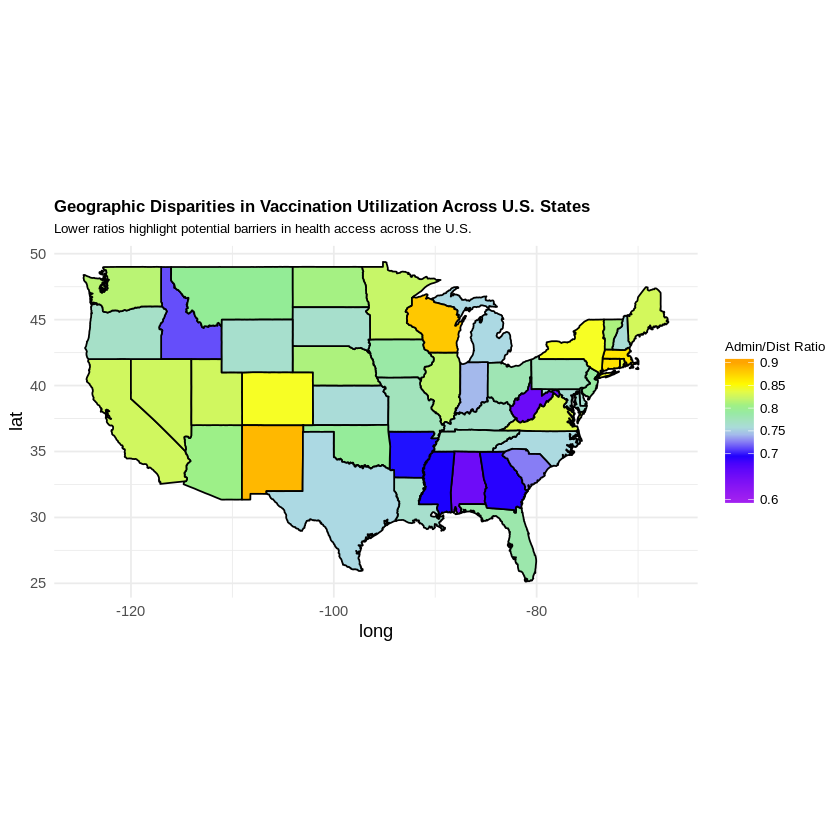

In [3]:
library(dplyr)
library(ggplot2)

# Summing up weekly values for each state
data_summed <- data %>%
  group_by(Location) %>%
  summarize(
    Admin_Per_100K = sum(Admin_Per_100K, na.rm = TRUE),
    Dist_Per_100K = sum(Dist_Per_100K, na.rm = TRUE)
  ) %>%
  mutate(Admin_Dist_Ratio = ifelse(Dist_Per_100K == 0, NA, Admin_Per_100K / Dist_Per_100K))

# Adjust Location column 
data_summed <- data_summed %>%
  mutate(region = tolower(state.name[match(Location, state.abb)]))

# Get U.S. states map data
us <- map_data("state")

# Merge the summarized data with the map data
us_map <- us %>%
  left_join(data_summed, by = "region")

# Define custom color breaks and colors
color_breaks <- c(0.6, 0.7, 0.75, 0.8, 0.85, 0.9)  # Adjust as needed for your data range
colors <- c("purple", "blue", "lightblue", "lightgreen", "yellow", "orange")

# Plot the map with custom color gradient
plot1<-ggplot(us_map, aes(long, lat, group = group, fill = Admin_Dist_Ratio)) +
  geom_polygon(color = "black") +
  coord_fixed(1.3) +
  scale_fill_gradientn(
    colors = colors,
    values = scales::rescale(color_breaks),
    limits = range(color_breaks),
    na.value = "grey",
    breaks = color_breaks,
    labels = color_breaks,
    name = "Admin/Dist Ratio"
  ) +
  labs(
    title = "Geographic Disparities in Vaccination Utilization Across U.S. States",
    subtitle = "Lower ratios highlight potential barriers in health access across the U.S."
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 10, face = "bold"),
    plot.subtitle = element_text(size = 8),
    legend.title = element_text(size = 8),
    legend.text = element_text(size = 8)
  )
plot1
ggsave("vac_access.png", plot = plot1, width = 8, height = 4, dpi = 300) 

### Geographic Disparities in  Vaccination Utilization for 65+ Age Group

I want visualize the Admin/Dist Ratio for the 65+ age group. I keep the same color range for this map for comparison. This 
map shows the Admin/Dist Ratio for the 65+ age group is substantially lower than for the general population.
When we look at the general population map (first map), we see a higher Admin/Dist Ratio across many states,
indicating relatively good vaccine administration compared to distribution.
However, for the 65+ age group, the ratios drop significantly, with most states showing ratios below 0.3.    

Loading required package: viridisLite

Attaching package: ‘viridis’

The following object is masked from ‘package:scales’:

    viridis_pal



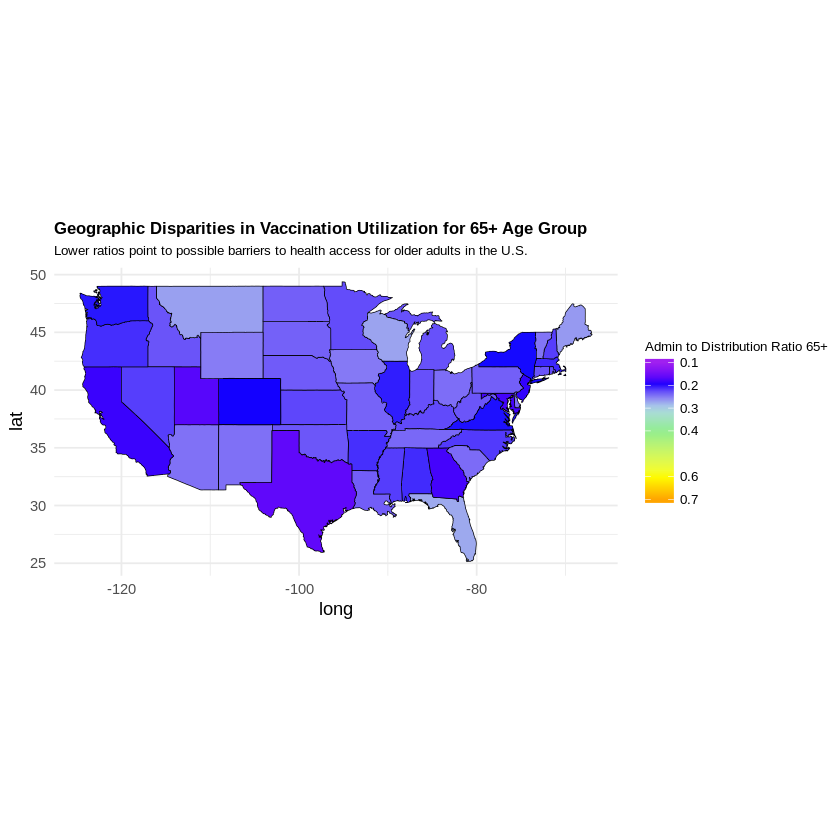

In [10]:
library(viridis)
# Summing up weekly values for each state for the 65+ age group
data_summed_65 <- data %>%
  group_by(Location) %>%
  summarize(
    Admin_Per_100k_65Plus = sum(Admin_Per_100k_65Plus, na.rm = TRUE),
    Distributed_Per_100k_65Plus = sum(Distributed_Per_100k_65Plus, na.rm = TRUE)
  ) %>%
  mutate(Ratio_65Plus = ifelse(Distributed_Per_100k_65Plus == 0, NA, Admin_Per_100k_65Plus / Distributed_Per_100k_65Plus)) %>%
  mutate(region = tolower(state.name[match(Location, state.abb)]))

# Get US map data
us <- map_data("state")
us_map_65 <- us %>%
  left_join(data_summed_65, by = "region")
# Define custom color breaks and colors
color_breaks <- c(0.1, 0.2, 0.3, 0.4,  0.6, 0.7)  # Adjust as needed for your data range
colors <- c("purple", "blue", "lightblue", "lightgreen", "yellow", "orange")
# Plot the map with enhanced visualization for 65+ age group
plot2<-ggplot(us_map_65, aes(long, lat, group = group, fill = Ratio_65Plus)) +
  geom_polygon(color = "black", size = 0.2) +
  scale_fill_gradientn(
    colors = colors,
    values = scales::rescale(color_breaks),
    limits = range(color_breaks),
    na.value = "grey",
    breaks = color_breaks,
    labels = color_breaks,
    name = "Admin to Distribution Ratio 65+"
  )+
  labs(
    title = "Geographic Disparities in Vaccination Utilization for 65+ Age Group",
    subtitle = "Lower ratios point to possible barriers to health access for older adults in the U.S."
  ) +
  coord_fixed(1.3) +  # Fix aspect ratio for accurate map projection
  theme_minimal() +
  theme(
    plot.title = element_text(size = 10, face = "bold"),
    plot.subtitle = element_text(size = 8),
    legend.title = element_text(size = 8),
    legend.text = element_text(size = 8)
  ) +guides(fill = guide_colorbar(reverse = TRUE))
plot2
ggsave("vac_65+.png", plot = plot2, width = 8, height = 4, dpi = 300)  

In [73]:
range(us_map_65$Ratio_65Plus, na.rm = TRUE)

[1] 0.1639664 0.2746935

### Changes in vaccination rates over time 
Here, I want to show changes in vaccination rates over time to indicate trends.

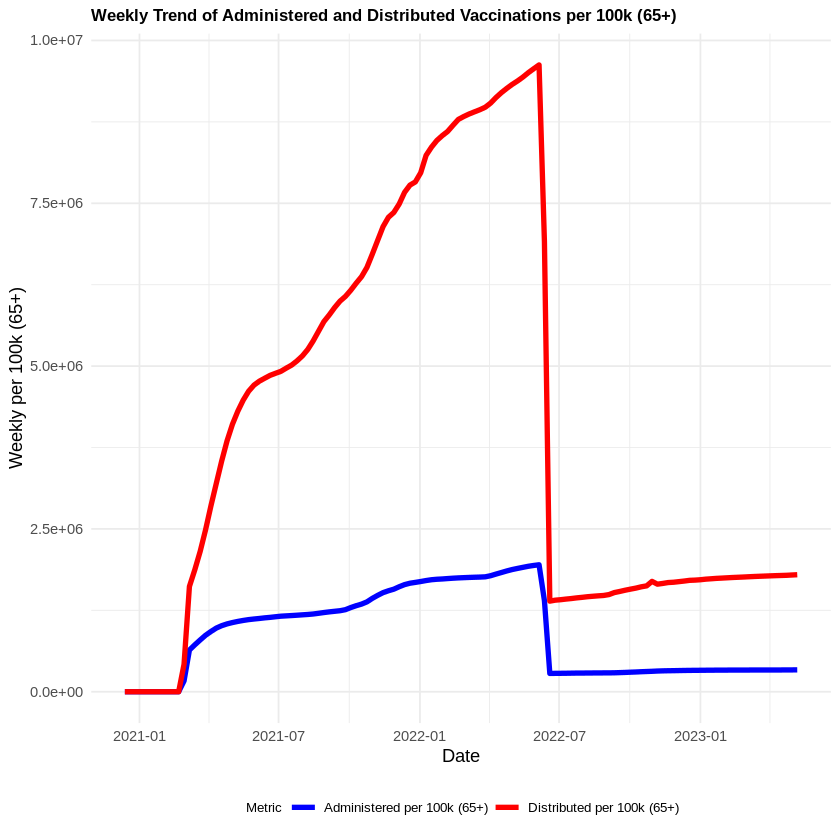

In [8]:
library(dplyr)
library(ggplot2)
library(lubridate)
library(tidyr)

# Filter for "US" in the location column
us_data <- data %>%
  filter(Location == "US")

# Convert the Date column to a Date format
us_data$Date <- as.Date(us_data$Date, format="%m/%d/%Y")


# Group by week and calculate weekly totals for Admin_Per_100k_65Plus and Distributed_Per_100k_65Plus
weekly_data <- us_data %>%
  group_by(week = floor_date(Date, "week")) %>%
  summarize(
    weekly_admin_per100k_65plus = sum(Admin_Per_100k_65Plus, na.rm = TRUE),
    weekly_distributed_per100k_65plus = sum(Distributed_Per_100k_65Plus, na.rm = TRUE)
  )

# Reshape data for plotting both variables in a single plot
weekly_data_long <- weekly_data %>%
  pivot_longer(cols = c(weekly_admin_per100k_65plus, weekly_distributed_per100k_65plus),
               names_to = "Metric", values_to = "Value")

# Plot the weekly trend 
plot3<-ggplot(weekly_data_long, aes(x = week, y = Value, color = Metric)) +
  geom_line(size = 1.5) +  # Increased line size
  labs(title = "Weekly Trend of Administered and Distributed Vaccinations per 100k (65+)",
       x = "Date",
       y = "Weekly per 100k (65+)",
       color = "Metric") +
  scale_color_manual(values = c("blue", "red"), 
                     labels = c("Administered per 100k (65+)", "Distributed per 100k (65+)")) +
  theme_minimal() +theme(
    plot.title = element_text(size = 10, face = "bold"),
    plot.subtitle = element_text(size = 8),
    legend.title = element_text(size = 8),
    legend.text = element_text(size = 8)
  ) +guides(fill = guide_colorbar(reverse = TRUE))+
  theme(legend.position = "bottom")
plot3
ggsave("Weekly_Trend.png", plot = plot3, width = 8, height = 4, dpi = 300)  

### Age Group Analysis for Vaccine Distribution
I want to show how vaccination distribution differs among various age groups (e.g., 18+, 65+).

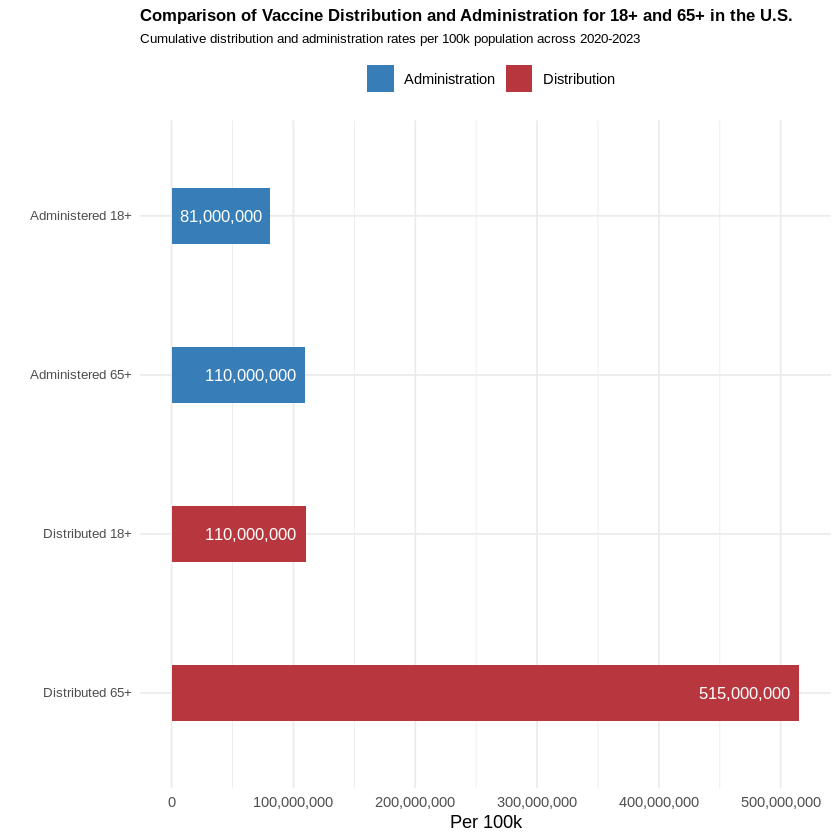

In [9]:
library(ggplot2)
library(scales)

# Filter and sum up each feature for the U.S.
data_summed_us <- data %>%
  filter(Location == "US") %>%
  summarize(
    Distributed_18Plus = sum(Distributed_Per_100k_18Plus, na.rm = TRUE),
    Distributed_65Plus = sum(Distributed_Per_100k_65Plus, na.rm = TRUE),
    Administered_18Plus = sum(Admin_Per_100k_18Plus, na.rm = TRUE),
    Administered_65Plus = sum(Admin_Per_100k_65Plus, na.rm = TRUE)
  )

# Reshape the data to a long format
data_long <- data_summed_us %>%
  pivot_longer(cols = everything(), names_to = "Feature", values_to = "Value") %>%
  mutate(
    Feature = recode(Feature,
                     "Distributed_18Plus" = "Distributed 18+",
                     "Distributed_65Plus" = "Distributed 65+",
                     "Administered_18Plus" = "Administered 18+",
                     "Administered_65Plus" = "Administered 65+"),
    Group = ifelse(grepl("Distributed", Feature), "Distribution", "Administration")
  )

# Plot
plot4<-ggplot(data_long, aes(x = reorder(Feature, -Value), y = Value, fill = Group)) +
  geom_bar(stat = "identity", width = 0.35) +
  geom_text(aes(label = scales::comma(Value, accuracy = 1e6)), hjust = 1.1, size = 3.5, color = "white") +
  scale_y_continuous(labels = scales::comma) +
  scale_fill_manual(values = c("Distribution" = "#B8373E", "Administration" = "#377eb8")) +
  labs(
    title = "Comparison of Vaccine Distribution and Administration for 18+ and 65+ in the U.S.",
    subtitle = "Cumulative distribution and administration rates per 100k population across 2020-2023",
    x = "",
    y = "Per 100k"
  ) +
  coord_flip() +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 10, face = "bold"),
    plot.subtitle = element_text(size = 8),
    axis.text.y = element_text(size = 8),
    legend.position = "top",
    legend.title = element_blank(),
    plot.caption = element_text(size = 8, hjust = 0)
  )
plot4
ggsave("Age Analysis.png", plot = plot4, width = 8, height = 4, dpi = 300)  

### Conclusion
My analysis investigates the disparities in COVID-19 vaccine administration and distribution, focusing on geographic
and age-based variations, particularly among the 65+ population.
This analysis also shows critical areas where public health efforts can focus to ensure equitable vaccine access for high-risk groups.

In [1]:
# Read your data here; 

# Clean it up, reformat it, filter it, sort it, group it, etc.

# Create your visualizations and save them as png files, then prepare your final pdf document elsewhere

# <- ALL YOUR CODE BELOW THIS POINT ->



---

# Common Pitfalls / Inefficiencies

**BEFORE you submit your end product, pay attention to the following and check your visualizations and story accordingly.**

**Think of this as a rubric; you will lose points if you don't follow all the principles we have seen in this course.**

---

### - Remember the design analysis questions:

**what, how, who, why?** 

- What are you showing/telling? 
- How are you going to show it (efficiency? visual channels, colors, tasks like comparison, trends, query, etc.) 
- Who is your audience? Why should they care about what you have to tell? What are the **actionable** information they can take from your story? 
- Why are you telling the story? What is your angle, message, point? (make it clear in text AND visuals) 

---

### - Pay attention to the color schemes/palettes:

 - Do NOT use sequential palettes for data attributes that have **no** ordering.
 - Do NOT use qualitative color schemes for attributes where order **matters**. 

---

###  - Color coordinate among plots so that the same data attributes have the same color in all plots:

You can do that by creating a manual palette and use it everywhere to make sure same color is always assigned to the same attribute value (especially important for categories). Do not change color of the same category among plots!

---

###  - Perceptual grouping is important! group and/or order values:

People tend to make sense of things and compare better when they are ordered or grouped:  

- In a bar chart, **order the axes** by time, value, etc. to make comparisons more intuitive. 

- Pie chart: order wedges. 

- In a bubble map, if you want to show trends, use grouping variable to **connect** bubbles, etc. 

---

### - No lengthy text in x axis:

- **Flip** the axes of a bar chart so that character values (text) are **readable on the y axis** left to right, 

**or** 

- at least, put them slanted in x axis for better readibility. 

---

### - Plot only those data columns and/or subsets that tell a clear story:

 - **No crowded** scatter plots with useless linear regression lines that don't tell anything.  
 - You do **NOT** have to plot **ALL** your data (most of the time, you should not). 
 - Look at alternative plots to tell your story effectively. 
 - Your plots should be perceived easily and intuitively. 
  
  

---

### - If you have too many classes (discrete variables/categories), try to GROUP them:

- Instead of giving a color to each of the dozen or so categories, you can put them in meaningful groups and color code to reduce clutter. 

- For sequential variables, you can do the same thing by **binning** numbers into bins (like in a histogram). 

- **Stepped color palettes** may be more useful than smooth sequential palettes (especially for comparison in choropleth maps) for a large range of values in an attribute. 

- You can **group/cluster data into meaningful chunks** and display those as bubble charts, networks, geographical regions, etc. 

- Do **NOT** dump all the data in the plot unless there is a CLEAR pattern/clustering to it that can be **perceived immediately**. 

---

### - ANNOTATE! ANNOTATE! ANNOTATE!

- **Tell** your audience what they are supposed to see. 

- Use **meaningful** titles with a message/statement, no dry titles. 

- Use nice and concise axis labels (make sure they are large enough).

- Use text annotations (look at the **examples in the lab notebook**).

---

### - THEMING

- **Good looking** charts are more **convincing**! Your audience will have more confidence in your work. 

- **Almost NEVER use the default color palette, default theme, or default fonts.**

- Use a subtle color scheme, nice fonts, interesting glyphs, etc. to make your charts look more **sophisticated**. 

---

### - Use space wisely!

- **Balance the plots** to use space effectively.

- Pay attention to **data-ink ratio**.

- **HAVE A FLOW left to right, top to bottom**. 

- If you must have a line plot or bar plot with a lot of empty space, try to put text annotations with relevant information in them. 